In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.tsa.stattools import acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from wealth_optimizer.bootstrap import generate_stationary_bootstrap_path
from wealth_optimizer.optimal_window_selection import get_optimal_block_size_stationary_bootstrap
from wealth_optimizer.optimal_window_selection import get_optimal_block_size_circular_bootstrap

In [2]:
raw_data = pd.read_excel('two_correlated_gbms_scenario_1.xlsx', index_col=0)

In [5]:
raw_data

,asset_1,asset_2
0.019231,0.029707,0.047149
0.038462,-0.015450,-0.012133
0.057692,0.002404,0.029142
0.076923,0.003313,0.056992
0.096154,0.020173,0.000992
...,...,...
99.903846,0.004451,0.049987
99.923077,0.002601,0.014300
99.942308,0.039459,0.108036
99.961538,-0.020860,-0.000215


<IPython.core.display.Javascript object>


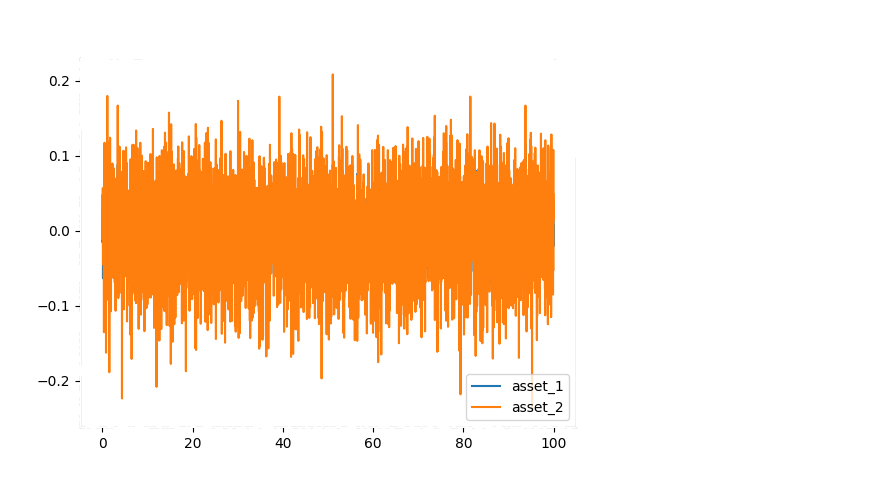

<AxesSubplot:>

In [4]:
raw_data.plot()

In [6]:
raw_data.corr()

,asset_1,asset_2
asset_1,1.000000,0.699396
asset_2,0.699396,1.000000


In [8]:
returns_data_1 = raw_data['asset_1'].to_numpy()
returns_data_2 = raw_data['asset_2'].to_numpy()

In [ ]:
display(returns_data)

In [ ]:
len(returns_data)

In [ ]:
gmb_acf_fig = plot_acf(returns_data)

In [ ]:
gmb_acf_fig.savefig('gmb_acf_fig.png')

In [ ]:
gmb_pacf_fig = plot_pacf(returns_data)

In [ ]:
gmb_pacf_fig.savefig('gmb_pacf_fig.png')

In [9]:
get_optimal_block_size_stationary_bootstrap(returns_data_1)

7

In [10]:
get_optimal_block_size_stationary_bootstrap(returns_data_2)

12

In [ ]:
gmb_acf_sq_fig = plot_acf(returns_data ** 2)

In [ ]:
gmb_pacf_sq_fig = plot_pacf(returns_data ** 2)

In [ ]:
get_optimal_block_size_circular_bootstrap(returns_data)

In [34]:
num_paths = 1000

In [35]:
paths = []  # list of numpy arrays
acfs = []
pacfs = []
corrs = []

In [36]:
for i in range(num_paths):
    if i % 100 == 0:
        print('path', i)
    path = generate_stationary_bootstrap_path(raw_data, expected_block_size = 7, n_req=100)
    df = pd.DataFrame(path)
    # print(df.corr())
    rho = df.corr().loc[0,1]
    corrs.append(rho)
    
#     auto_corrs = acf(path, nlags=20)
#     partial_auto_corrs = pacf(path, nlags=20)
#     paths.append(path)
#     acfs.append(auto_corrs)
#     pacfs.append(partial_auto_corrs)

path 0
path 100
path 200
path 300
path 400
path 500
path 600
path 700
path 800
path 900


In [37]:
np.mean(corrs)

0.6970499789084542

In [ ]:
lag_1_acfs = [x[1] for x in acfs]

In [ ]:
np.mean(lag_1_acfs)

In [ ]:
np.mean([x[10] for x in acfs])

In [ ]:
np.mean([x[0] for x in pacfs])

In [ ]:
np.mean([x[1] for x in pacfs])

In [ ]:
np.mean([x[2] for x in pacfs])

In [ ]:
average_acfs = []
average_pacfs = []
lags = []

In [ ]:
for lag in range(20):
    lags.append(lag)
    average_acfs.append(np.mean([x[lag] for x in acfs]))
    average_pacfs.append(np.mean([x[lag] for x in pacfs]))

In [ ]:
fig1, ax = plt.subplots()
# plt.plot(lags, average_acfs, marker='o', linestyle='None')
plt.stem(lags, average_acfs) #, marker='o', linestyle='None')
plt.title('Empirical Autocorrelation for Bootstrapped Data')
plt.xlabel('Lag')
ax.set_xticks(lags, minor=False)
plt.ylabel('Autocorrelation')
fig1.savefig('gbm_acf_sb.png')

In [ ]:
fig2, ax = plt.subplots()
# plt.plot(lags, average_acfs, marker='o', linestyle='None')
plt.stem(lags, average_pacfs) #, marker='o', linestyle='None')
plt.title('Empirical Partial Autocorrelation for Bootstrapped Data')
plt.xlabel('Lag')
ax.set_xticks(lags, minor=False)
plt.ylabel('Partial Autocorrelation')
fig2.savefig('gbm_pacf_sb.png')